In [14]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

,x
t,
1,22.54
2,-17.46
3,-26.46
4,11.54
5,6.54


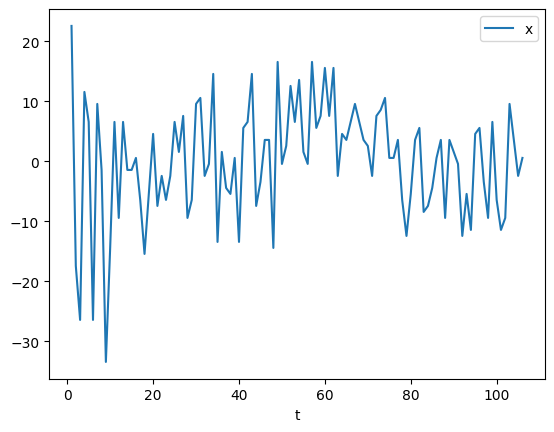

In [35]:
df = pd.read_csv('data/Annual_rainfall_eastern_USA_1817_1922.csv').set_index('t').sort_index()
df.plot()
df.head()

In [37]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['x'], order=(4,2,1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

/home/alt/micromamba/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alt/micromamba/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/alt/micromamba/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  106
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -383.720
Date:                Thu, 21 Mar 2024   AIC                            779.441
Time:                        17:39:22   BIC                            795.307
Sample:                             0   HQIC                           785.869
                                - 106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8287      0.120     -6.907      0.000      -1.064      -0.594
ar.L2         -0.8386      0.142     -5.888      0.000      -1.118      -0.559
ar.L3         -0.3323      0.145     -2.295      0.0

In [38]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [39]:
#Размеры выборок
print('Обучающие данные',len(train))
print('Тренировочные данные',len(test))

Обучающие данные 69
Тренировочные данные 37


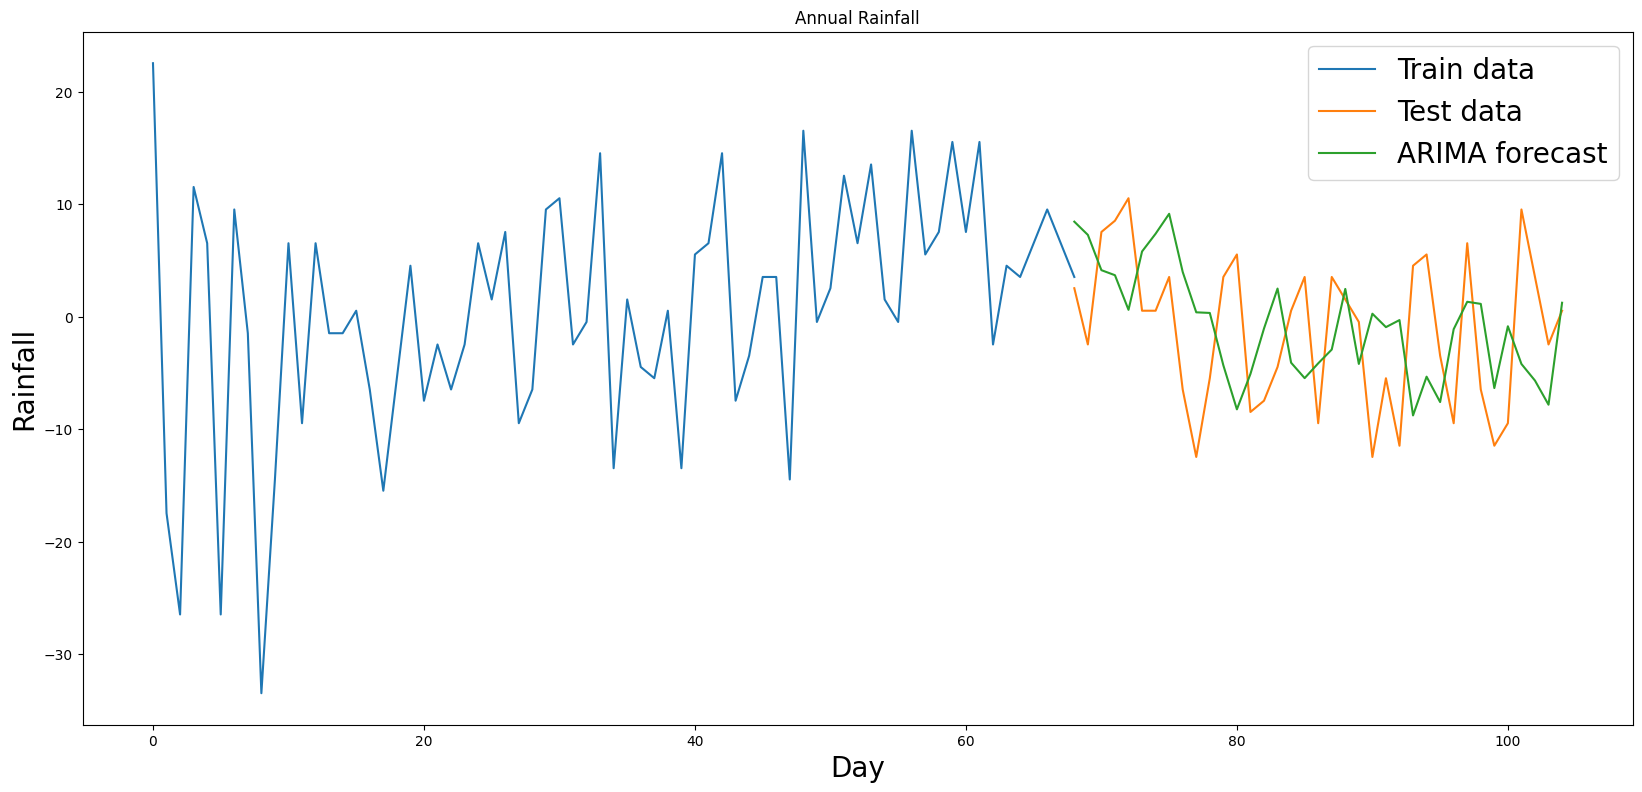

In [43]:
#Визуализация предсказания с помощью ARIMA
fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.title('Annual Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Day', fontsize="20")
plt.show()


In [42]:
def SMAPE(y_true, y_pred):
    numerator = np.abs(y_true-y_pred)
    denumerator = (np.abs(y_true) + np.abs(y_pred))/2
    res = numerator/denumerator
    res = np.sum(res)
    res *= 100
    res /= len(y_true)
    return res
def stats(df, pred):
    print("RMSE:", np.sqrt(mean_squared_error(df, pred)))
    print("MAPE:", mean_absolute_percentage_error(df, pred))
    print("MAE:", mean_absolute_error(df, pred))
    print("R2: ", r2_score(df, pred))
    print("SMAPE", SMAPE(df, pred))

In [44]:
#Метрики
stats(test[:dur], arma_predictions)

RMSE: 8.04444245483825
MAPE: 2.3338974428720354
MAE: 7.290405961276181
R2:  -0.4728540562959327
SMAPE 152.49297424452965


<Axes: xlabel='t'>

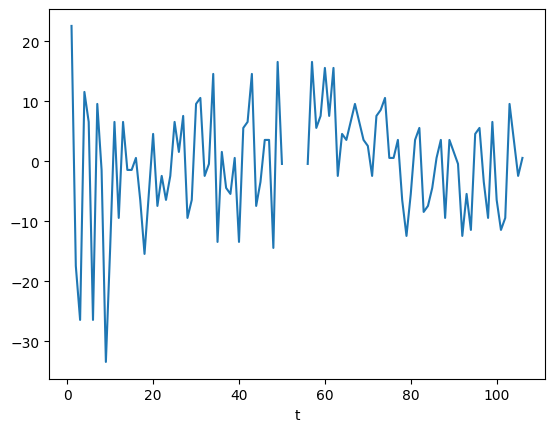

In [45]:
#Пропуск
o_df = df.copy()

o_df["x"][50:55] = np.nan

o_df["x"].plot()

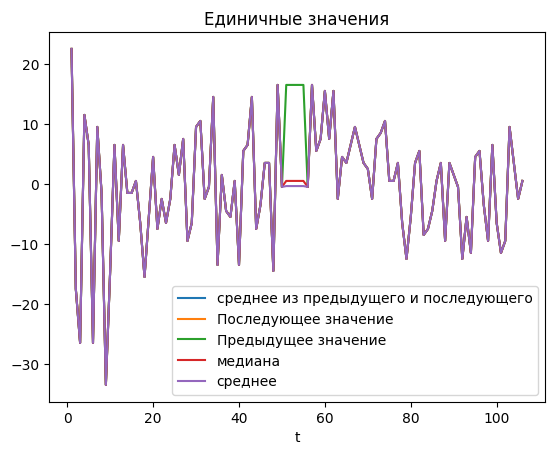

In [46]:
new_value = (o_df["x"][55] + o_df["x"][49])/2
o_df["x"][50:55] = new_value
o_df['x'].plot(label="среднее из предыдущего и последующего",)

new_value = o_df["x"][55]
o_df["x"][50:55] = new_value
o_df['x'].plot(label='Последующее значение')

new_value = o_df["x"][49]
o_df["x"][50:55] = new_value
o_df["x"].plot(label='Предыдущее значение')

new_value = o_df["x"].median()
o_df["x"][50:55] = new_value
o_df["x"].plot(label='медиана') 

new_value = o_df["x"].mean()
o_df["x"][50:55] = new_value
o_df["x"].plot(label='среднее', title="Единичные значения") 

plt.legend()
plt.show()

<Axes: title={'center': 'zero'}, xlabel='t'>

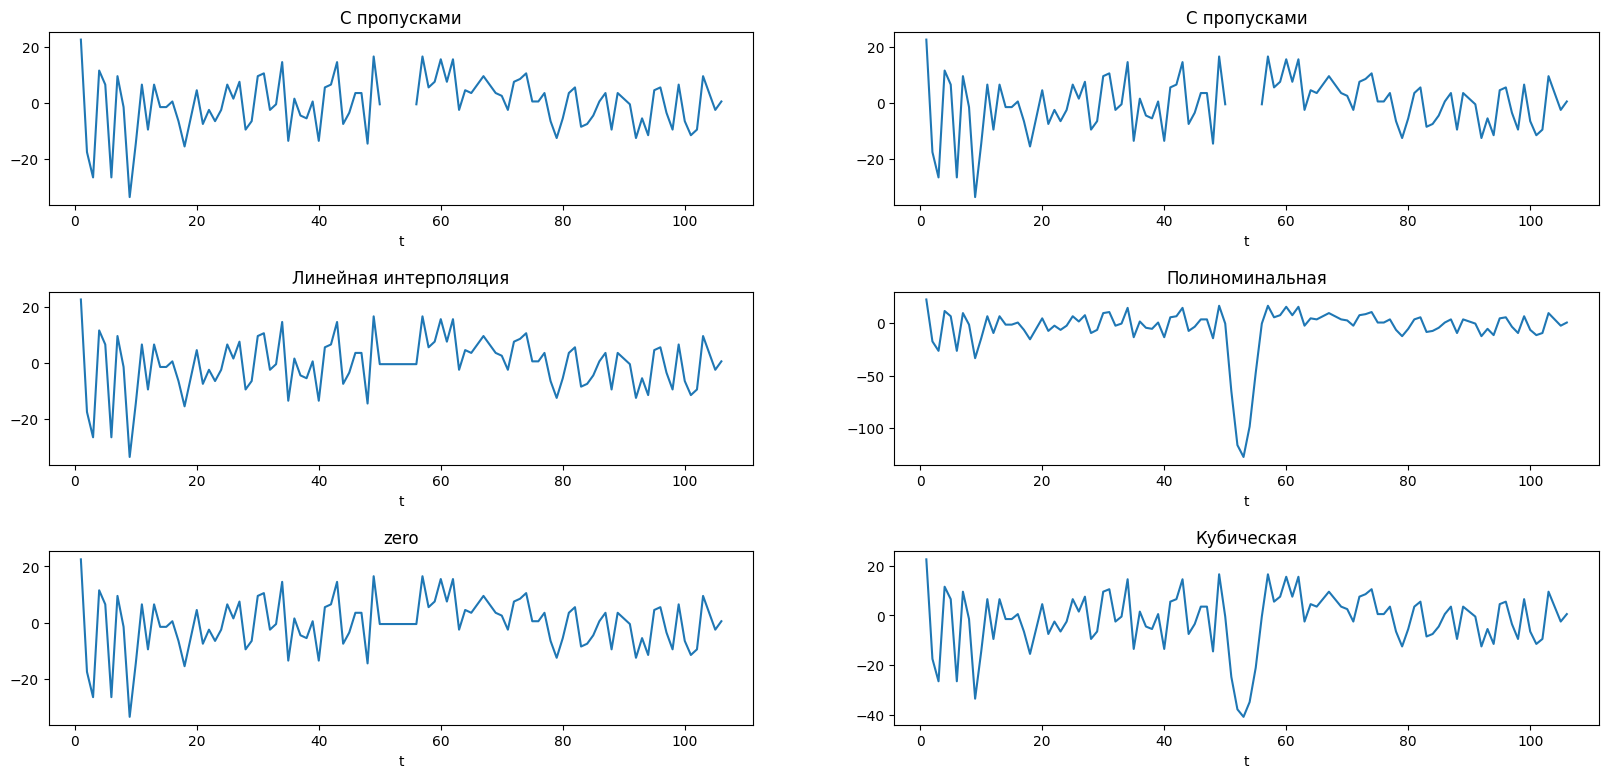

In [47]:
o_df["x"][50:55] = np.nan

lin_df = o_df.interpolate(method="linear")

cub_df = o_df.interpolate(method="cubic")

pol_df = o_df.interpolate(method="polynomial", order=5)

zero_df = o_df.interpolate(method="zero")


fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))
 
o_df['x'].plot(title="С пропусками", ax = original_ax)  
o_df['x'].plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))  
lin_df['x'].plot(title="Линейная интерполяция", ax = lin_ax) 
cub_df['x'].plot(title="Кубическая", ax = cub_ax) 
pol_df['x'].plot(title="Полиноминальная", ax = pol_ax) 
zero_df['x'].plot(title="zero", ax=zero_ax)

<Axes: >

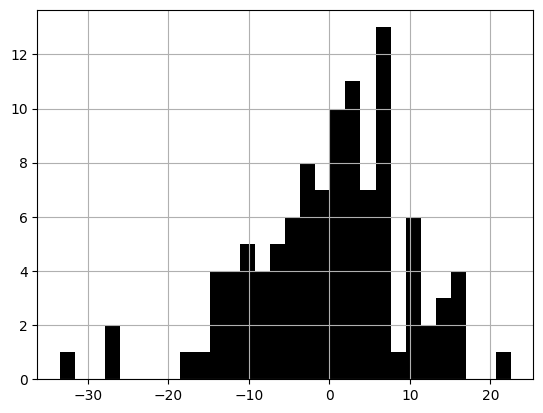

In [49]:
#Поиск выбросов
import seaborn as sns
df["x"].hist(bins=30, color="black")

Text(0.5, 1.0, 'Rainfall')

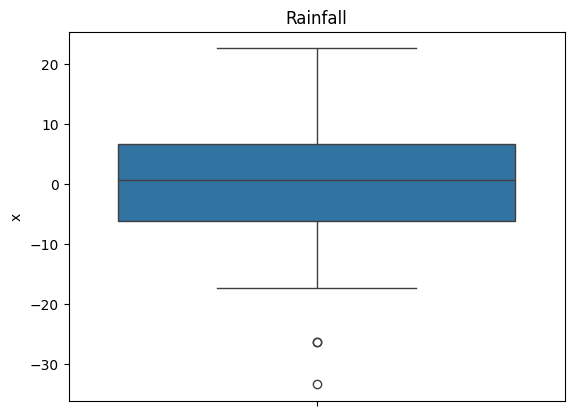

In [50]:
sns.boxplot(df.x).set_title('Rainfall')

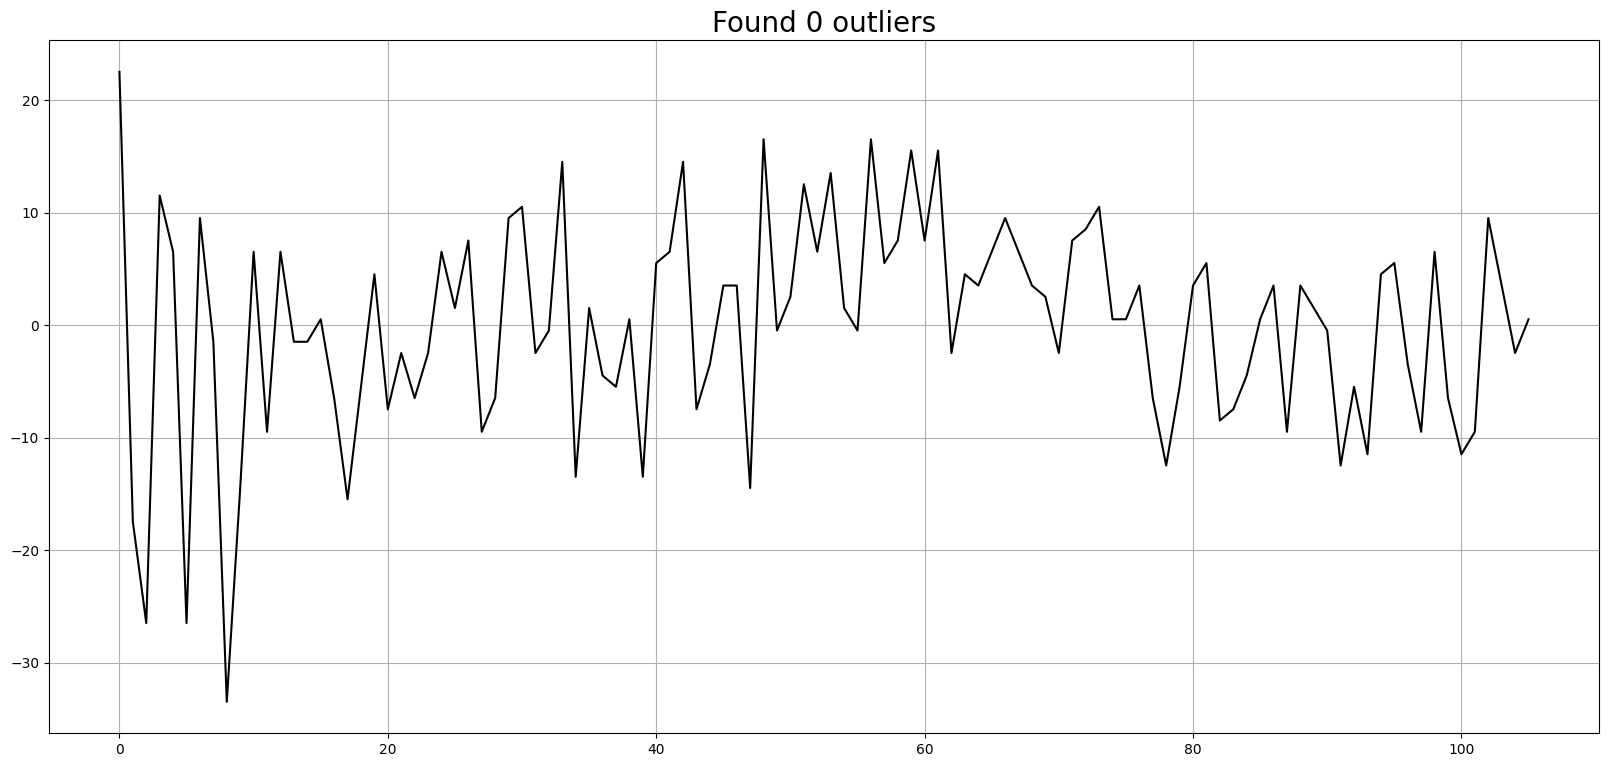

In [56]:
from sklearn import preprocessing, svm
scaler = preprocessing.StandardScaler()
perc = 0.01

local_df = df["x"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
model.fit(ts_scaled)
## dtf output
dtf_outliers =local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                                            x: 1 if x==-1 else 0)
## plot
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
        color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
           y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
           color='red', linewidths=10)
plt.title(f"Found {sum(dtf_outliers['outlier']==1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

/tmp/ipykernel_81114/218647947.py:12: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts_clean1 = ts_clean1.interpolate(method="pad")


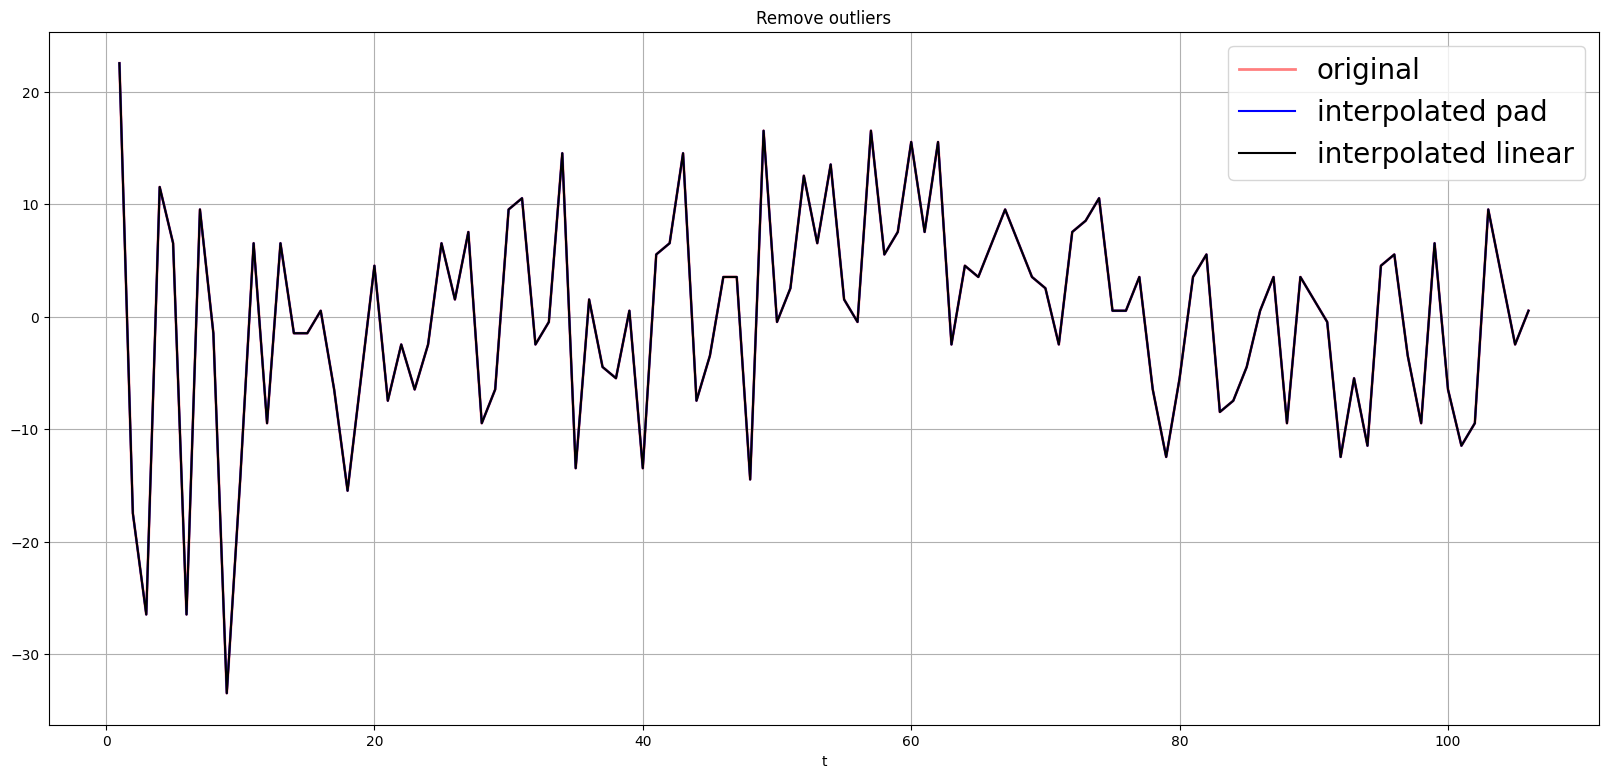

In [55]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5,
             title="Remove outliers", label="original", legend=True, linewidth=2)


ts_clean1 = local_df.copy()
ts_clean1.loc[outliers_idx] = np.nan
ts_clean1 = ts_clean1.interpolate(method="pad")
# ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5,
#              title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean1.plot(ax=ax, grid=True, color="blue",
              label="interpolated pad", legend=True)
ts_clean.plot(ax=ax, grid=True, color="black",
              label="interpolated linear", legend=True)

plt.legend(fontsize="20")
plt.show()